In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dataset.csv')

In [3]:
import numpy as np

In [4]:
dados.isnull().sum()

id_registo           0
temperatura          2
humidade_relativa    0
luz                  4
CO2                  0
humidade_absoluta    0
ocupacao             0
dtype: int64

In [5]:
dados.temperatura = dados.temperatura.fillna(dados.temperatura.mean())
dados.luz = dados.luz.fillna(dados.luz.mean())

In [6]:
dados.shape

(12000, 7)

In [7]:
y= np.array(dados['ocupacao'])

In [8]:
dados= dados.drop('ocupacao', axis = 1)
dados= dados.drop('id_registo',axis =1)

In [9]:
X = np.array(dados)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
from sklearn.ensemble import RandomForestClassifier


In [13]:
rf = RandomForestClassifier(random_state = 1)

In [14]:
rf.fit(Xtreino,ytreino);

In [15]:
eficacia=rf.score(Xteste,yteste)*100

In [16]:
print (round(eficacia,2))

94.79


In [17]:
import matplotlib.pyplot as plt

In [18]:
preditores=['Temp','Humidade_Rel','Luz','CO2','Humidade_Abs']

Text(0.5, 1.0, 'Importância das variaveis')

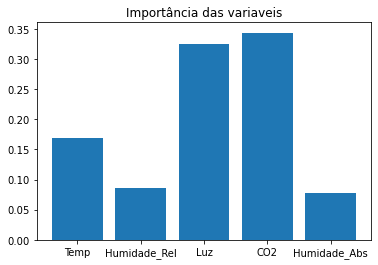

In [19]:
plt.bar(preditores, rf.feature_importances_);
plt.title('Importância das variaveis')

In [20]:
prever = pd.read_csv('dataset_naoclassificado.csv')

In [21]:
prever.head()

,id_registo,temperatura,humidade_relativa,luz,CO2,humidade_absoluta
0,17761,22.561779,29.744439,904.055524,806.036356,0.004797
1,25264,22.869926,33.894069,107.935028,1549.241728,0.006084
2,30252,20.486633,35.911496,57.554649,488.975145,0.005515
3,19288,20.305429,30.604171,0.000000,532.881435,0.004174
4,15273,21.012591,31.802713,0.000000,552.741722,0.004752


In [22]:
prever2 = prever.drop('id_registo',axis =1)

In [23]:
previsao = rf.predict(prever2)

In [24]:
previsao = pd.DataFrame(previsao)

In [25]:
previsao = previsao.rename(columns={0:'ocupacao'})

In [26]:
 result = pd.concat([prever['id_registo'], previsao], axis=1)

In [27]:
result=result.set_index('id_registo')

In [28]:
result.to_csv('classificacao_estimada.csv')